# INM434 Natural Language Processing Final Report

## By Ho Yin Tam

### Data exploration

Import the library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Load the dataset.

In [2]:
# Load the dataset
res = pd.read_csv('restaurant_reviews.csv')
res

,text,labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Check the data type of the columns.

In [3]:
res.dtypes

text      object
labels     int64
dtype: object

Check if there is any missing value and data.

In [4]:
res.isnull().sum()

text      0
labels    0
dtype: int64

Check if there is any duplicate rows.

In [5]:
print(res[res.duplicated()])

                                  text  labels
814                 I love this place.       1
816             The food was terrible.       0
843                   I won't be back.       0
846  I would not recommend this place.       0


Remove these 4 duplicated rows.

In [6]:
res_noduplicate = res.drop_duplicates()
res_noduplicate

,text,labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Visualization before text preprocessing.

Before text preprocessing, visualize the most common and frequent words appeared in positive reviews and negative reviews using word cloud.

In [7]:
# Join all positive reviews into one string
postive_text_before_preprocess = ' '.join(res_noduplicate[res_noduplicate['labels'] == 1]['text'])
print(postive_text_before_preprocess)

Wow... Loved this place. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. The fries were great too. A great touch. Service was very prompt. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! Highly recommended. The food, amazing. Service is also cute. I could care less... The interior is just beautiful. So they performed. That's right....the red velvet cake.....ohhh this stuff is so good. This hole in the wall has great Mexican street tacos, and friendly staff. Also there are combos like a burger, fries, and beer for 23 which is a decent deal. I found this place by accident and I could not be happier. Overall, I like this place a lot. The only redeeming quality of the restaurant was that it was very inexpensive. Ample portions and good prices. My first visit to Hiro was a delight! The shrimp tender and moist. On a positive note, our server was very attentive and provided great s

In [8]:
# Join all negative reviews into one string
negative_text_before_preprocess = ' '.join(res_noduplicate[res_noduplicate['labels'] == 0]['text'])
print(negative_text_before_preprocess)

Crust is not good. Not tasty and the texture was just nasty. Now I am getting angry and I want my damn pho. Honeslty it didn't taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! - They never brought a salad we asked for. Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed. The worst was the salmon sashimi. This was like the final blow! seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere. Poor service

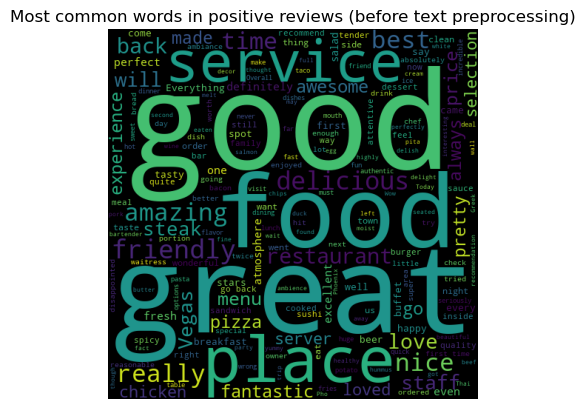

In [9]:
# Generatethe word cloud for positive reviews
positive_wordcloud_before_preprocess = WordCloud(height = 500, width = 500, background_color = 'black').generate(postive_text_before_preprocess)
plt.title('Most common words in positive reviews (before text preprocessing)')
plt.axis('off')
plt.imshow(positive_wordcloud_before_preprocess)

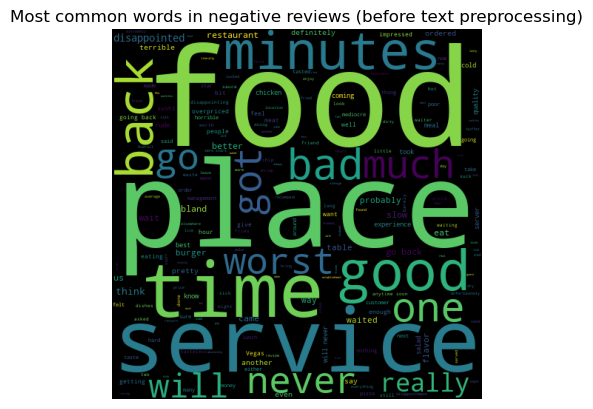

In [10]:
# Generatethe word cloud for negative reviews
negative_wordcloud_before_preprocess = WordCloud(height = 500, width = 500, background_color = 'black').generate(negative_text_before_preprocess)
plt.title('Most common words in negative reviews (before text preprocessing)')
plt.axis('off')
plt.imshow(negative_wordcloud_before_preprocess)

Before text preprocessing, visualize the reviews length of positive and negative reviews using boxplot and histograms.

In [11]:
# Extract the positive reviews as data frame and count
positive_review_length_before_preprocess = res_noduplicate[res_noduplicate['labels'] == 1]['text'].apply(lambda x: len(x.split()))
positive_review_length_before_preprocess

0       4
3      15
4      12
8       5
9       3
       ..
899     4
901    14
907     8
909     8
922    13
Name: text, Length: 499, dtype: int64

In [12]:
# Extract the negative reviews as data frame and count
negative_review_length_before_preprocess = res_noduplicate[res_noduplicate['labels'] == 0]['text'].apply(lambda x: len(x.split()))
negative_review_length_before_preprocess

1       4
2       8
5      11
6       6
7      22
       ..
995    12
996     3
997    10
998    16
999    28
Name: text, Length: 497, dtype: int64

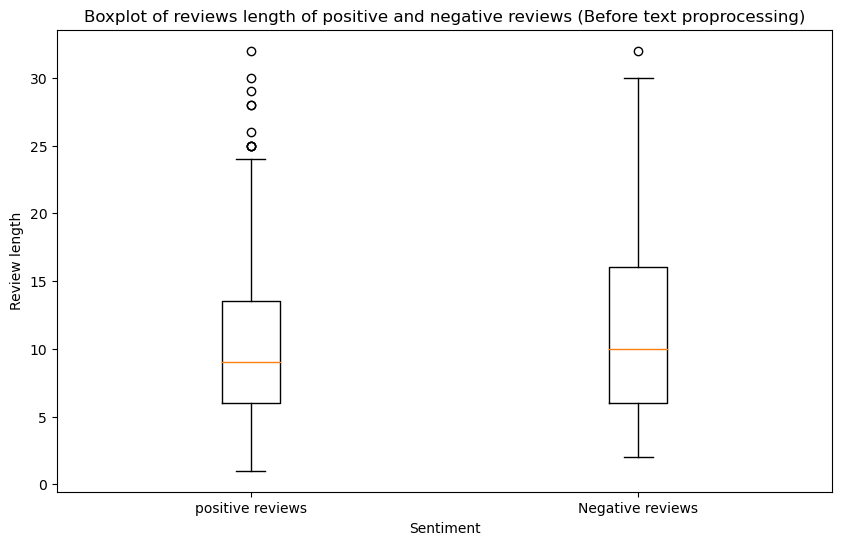

In [13]:
# Visualize the reviews length of positive and negative reviews using boxplot
plt.figure(figsize = (10,6))
plt.boxplot([positive_review_length_before_preprocess, negative_review_length_before_preprocess], labels = ['positive reviews', 'Negative reviews'])
plt.title('Boxplot of reviews length of positive and negative reviews (Before text proprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Review length')
plt.show()

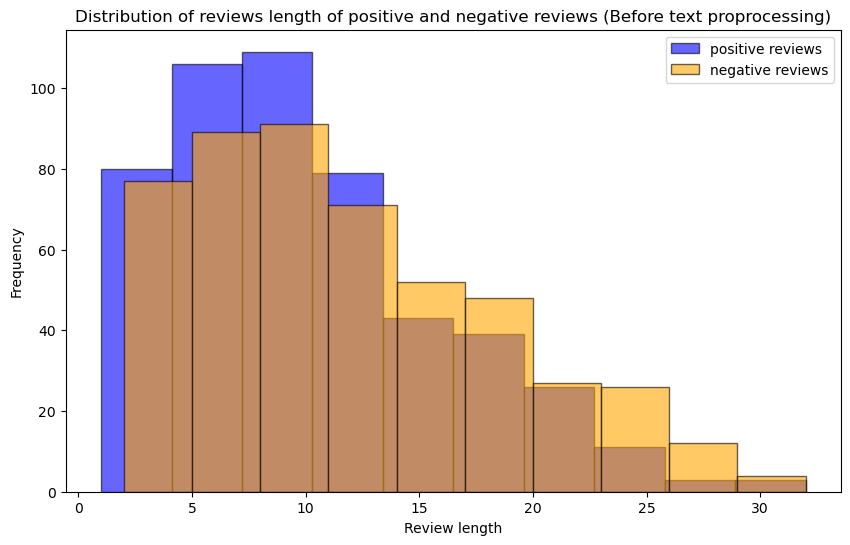

In [14]:
# Visualize the reviews length of positive and negative reviews using histograms
plt.figure(figsize = (10,6))
plt.hist(positive_review_length_before_preprocess, color = 'blue', edgecolor = 'black', alpha = 0.6, label = 'positive reviews')
plt.hist(negative_review_length_before_preprocess, color = 'orange', edgecolor = 'black', alpha = 0.6, label = 'negative reviews')
plt.legend()
plt.title('Distribution of reviews length of positive and negative reviews (Before text proprocessing)')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.show()

### Data preprocessing

Perform text preprocessing.

In [15]:
# Download the required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tamho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function for text preprocessing
def text_preprocessing(text):
    
    # Replace the character that is not a uppercase, lowercase or whitespace with an empty string
    text = re.sub(r"[^a-zA-Z\s]", "", text) 
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string or sentence
    text_processed = ' '.join(tokens)
    
    return text_processed

Apply the above defined function to the dataset.

In [17]:
res_clean = res_noduplicate.copy()
res_clean['text'] = res_noduplicate['text'].apply(text_preprocessing)
res_clean

,text,labels
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall impressed would go back,0
998,whole experience underwhelming think well go n...,0


Visualize the proportion of positive comments and negative comments using the bar chart.

In [18]:
# Number of positive reviews
pr = np.sum(res_clean['labels'] == 1)

# Number of negative reviews
nr = np.sum(res_clean['labels'] == 0)

In [19]:
print('Number of positve reviews:', pr)
print('Number of negative reviews:', nr)
print('Percentage of positive reviews:', pr/ (pr + nr))
print('Percentage of negative reviews:', nr/ (pr + nr))

Number of positve reviews: 499
Number of negative reviews: 497
Percentage of positive reviews: 0.501004016064257
Percentage of negative reviews: 0.49899598393574296


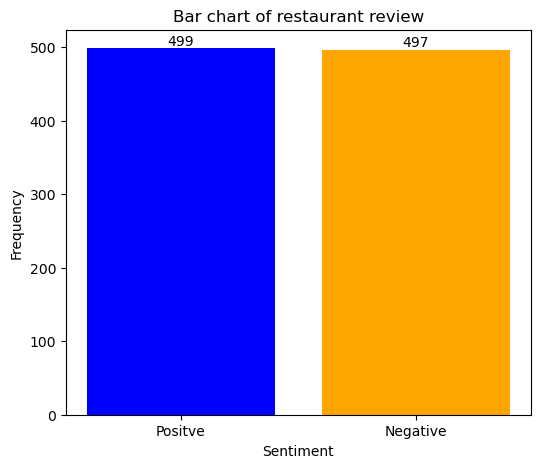

In [20]:
plt.figure(figsize = (6, 5))
barchart = plt.bar(['Positve', 'Negative'], [pr, nr], color = ['blue', 'orange'])

for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha = 'center', va = 'bottom')

plt.title('Bar chart of restaurant review')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.show()

Visualize the most common and frequent words appeared in positive reviews and negative reviews using word cloud.

In [21]:
# Join all positive reviews into one string
postive_text = ' '.join(res_clean[res_clean['labels'] == 1]['text'])
print(postive_text)

wow loved place stopped late may bank holiday rick steve recommendation loved selection menu great price fry great great touch service prompt tried cape cod ravoli chicken cranberrymmmm highly recommended food amazing service also cute could care le interior beautiful performed thats rightthe red velvet cakeohhh stuff good hole wall great mexican street taco friendly staff also combo like burger fry beer decent deal found place accident could happier overall like place lot redeeming quality restaurant inexpensive ample portion good price first visit hiro delight shrimp tender moist positive note server attentive provided great service thing like prime rib dessert section burger good beef cooked right want sandwich go firehouse side greek salad greek dressing tasty pita hummus refreshing ordered duck rare pink tender inside nice char outside came running u realized husband left sunglass table chow mein good portion huge loved itfriendly server great food wonderful imaginative menu salad

In [22]:
# Join all negative reviews into one string
negative_text = ' '.join(res_clean[res_clean['labels'] == 0]['text'])
print(negative_text)

crust good tasty texture nasty getting angry want damn pho honeslty didnt taste fresh potato like rubber could tell made ahead time kept warmer would go back cashier care ever say still ended wayyy overpriced disgusted pretty sure human hair shocked sign indicate cash waitress little slow service place worth time let alone vega like burrittos blah never brought salad asked took hour get food table restaurant food luke warm sever running around like totally overwhelmed worst salmon sashimi like final blow seems like good quick place grab bite familiar pub food favor look elsewhere poor service waiter made feel like stupid every time came table service suck deal good enough would drag establishment hard judge whether side good grossed melted styrofoam didnt want eat fear getting sick frozen puck disgust worst people behind register bad food damn generic horrible attitude towards customer talk one customer dont enjoy food heart attack grill downtown vega absolutely flatlined excuse restau

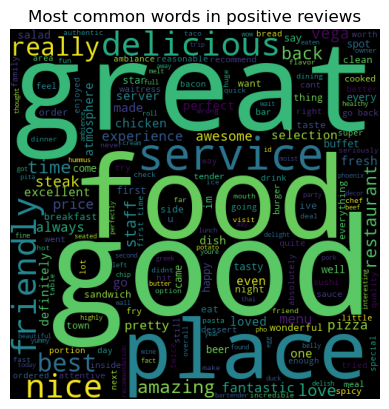

In [23]:
# Generatethe word cloud for positive reviews
positive_wordcloud = WordCloud(height = 500, width = 500, background_color = 'black').generate(postive_text)
plt.title('Most common words in positive reviews')
plt.axis('off')
plt.imshow(positive_wordcloud)

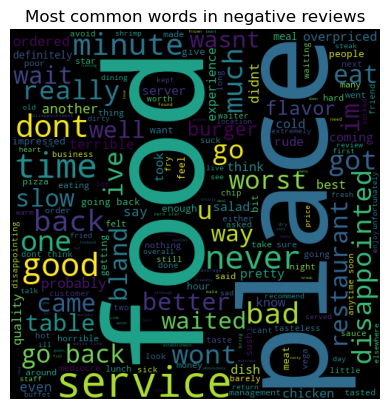

In [24]:
# Generatethe word cloud for negative reviews
negative_wordcloud = WordCloud(height = 500, width = 500, background_color = 'black').generate(negative_text)
plt.title('Most common words in negative reviews')
plt.axis('off')
plt.imshow(negative_wordcloud)

Visualize the reviews length of positive and negative reviews using boxplot and histograms.

In [25]:
# Extract the positive reviews as data frame and count
positive_review_length = res_clean[res_clean['labels'] == 1]['text'].apply(lambda x: len(x.split()))
positive_review_length

0      3
3      9
4      4
8      2
9      2
      ..
899    3
901    9
907    3
909    5
922    8
Name: text, Length: 499, dtype: int64

In [26]:
# Extract the negative reviews as data frame and count
negative_review_length = res_clean[res_clean['labels'] == 0]['text'].apply(lambda x: len(x.split()))
negative_review_length

1       2
2       3
5       5
6       4
7      10
       ..
995     5
996     3
997     5
998    10
999    12
Name: text, Length: 497, dtype: int64

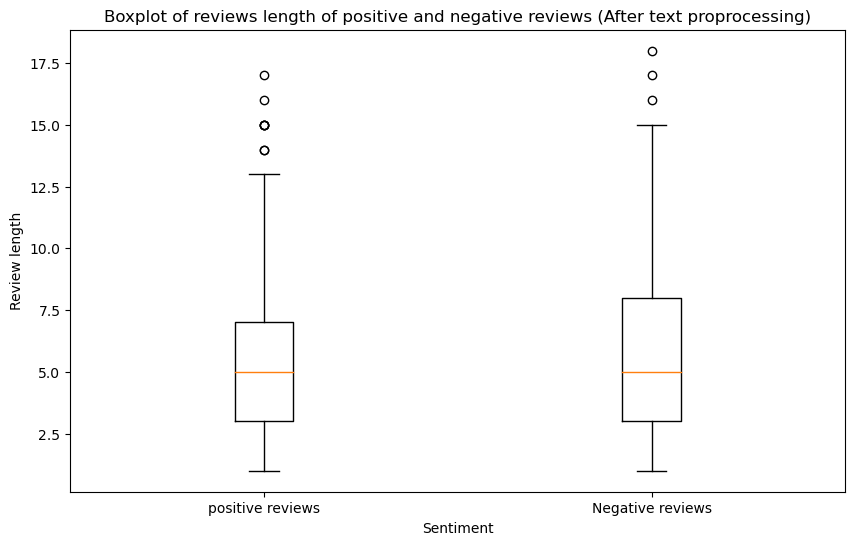

In [27]:
# After text preprocessing
plt.figure(figsize = (10,6))
plt.boxplot([positive_review_length, negative_review_length], labels = ['positive reviews', 'Negative reviews'])
plt.title('Boxplot of reviews length of positive and negative reviews (After text proprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Review length')
plt.show()

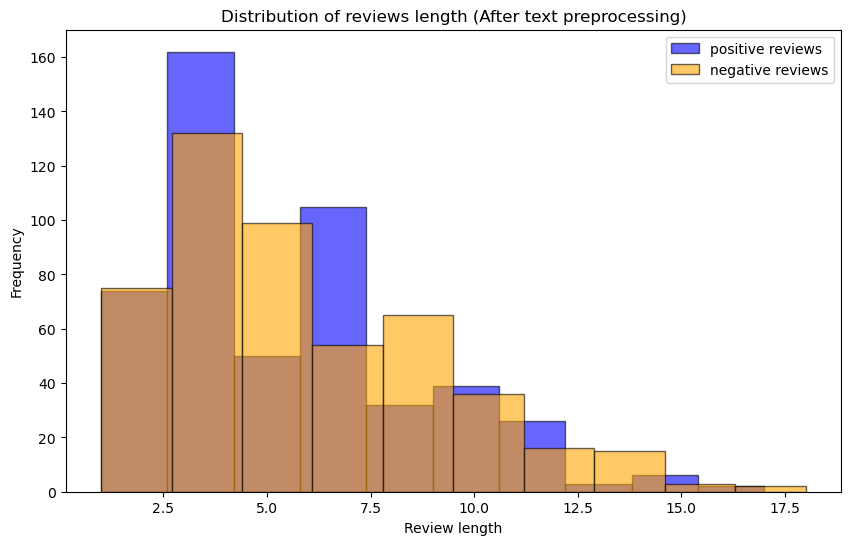

In [28]:
# After text preprocessing
plt.figure(figsize = (10,6))
plt.hist(positive_review_length, color = 'blue', edgecolor = 'black', alpha = 0.6, label = 'positive reviews')
plt.hist(negative_review_length, color = 'orange', edgecolor = 'black', alpha = 0.6, label = 'negative reviews')
plt.legend()
plt.title('Distribution of reviews length (After text preprocessing)')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.show()

### Split the cleaned dataset into training and test set and save as csv file

In [29]:
# Split the dataset into feature and label
X= res_clean['text']
y= res_clean['labels']

# Split it into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Display the shape
print('Training set (text) shape:', X_train.shape)
print('Training set (label) shape:', y_train.shape)
print('Test set (text) shape:', X_test.shape)
print('Test set (label) shape:', y_test.shape)

# Save them as CSV file
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

Training set (text) shape: (796,)
Training set (label) shape: (796,)
Test set (text) shape: (200,)
Test set (label) shape: (200,)
